In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./Data/Sam_Data/combined.csv')
df = df.dropna()
# Find the number of unique items in each column
unique_counts = df.nunique()

unique_items = df['Sensor'].unique()

# Display the results
print(unique_counts)
print(unique_items)

Unnamed: 0    268024
DateTime       17754
Sensor             9
Value              2
Timestamp      10696
dtype: int64
['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light']


In [98]:
from datetime import datetime

def convert_to_seconds(date_str):
    date_obj = datetime.strptime(date_str, '%m/%d/%Y %H:%M:%S')
    return int(date_obj.timestamp())

df['seconds_since_epoch'] = df['Timestamp'].apply(convert_to_seconds)
print(df.head())

   Unnamed: 0 DateTime           Sensor  Value            Timestamp  \
0           0  36:22.9    bathroom_door    0.0  12/20/2022 17:36:23   
1           1  36:24.2    bathroom_door    0.0  12/20/2022 17:36:24   
2           2  36:24.2  bathroom_button    0.0  12/20/2022 17:36:24   
3           3  36:24.2    bathroom_door    0.0  12/20/2022 17:36:24   
4           4  36:24.6   bathroom_light    1.0  12/20/2022 17:36:25   

   seconds_since_epoch  
0           1671579383  
1           1671579384  
2           1671579384  
3           1671579384  
4           1671579385  


In [99]:
# Sample the data on different time frames and get sum of the active sensors on that data

df['date'] = pd.to_datetime(df['Timestamp']) #convert the Timestamp to datetime
df = df.set_index('date') #make the date column as index
df_hourly = df.Value.resample('h').sum() #resample on hourly basis and get summary of sensor values on that hour.

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_minute = df.Value.resample('15min').sum()

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_2hours = df.Value.resample('2h').sum()

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_6hours = df.Value.resample('6h').sum()

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_day = df.Value.resample('1d').sum()

# df_hourly.columns = ['date', 'values']
df_hourly = df_hourly.reset_index()
df_minute = df_minute.reset_index()
df_2hours = df_2hours.reset_index()
df_6hours = df_6hours.reset_index()
df_day = df_day.reset_index()

# new_df = pd.DataFrame(df_hourly, columns=['datetime', 'values'])
print(df_hourly.columns, df_minute.shape, df_2hours.shape, df_hourly.size)

Index(['date', 'Value'], dtype='object') (2586, 2) (324, 2) 1294


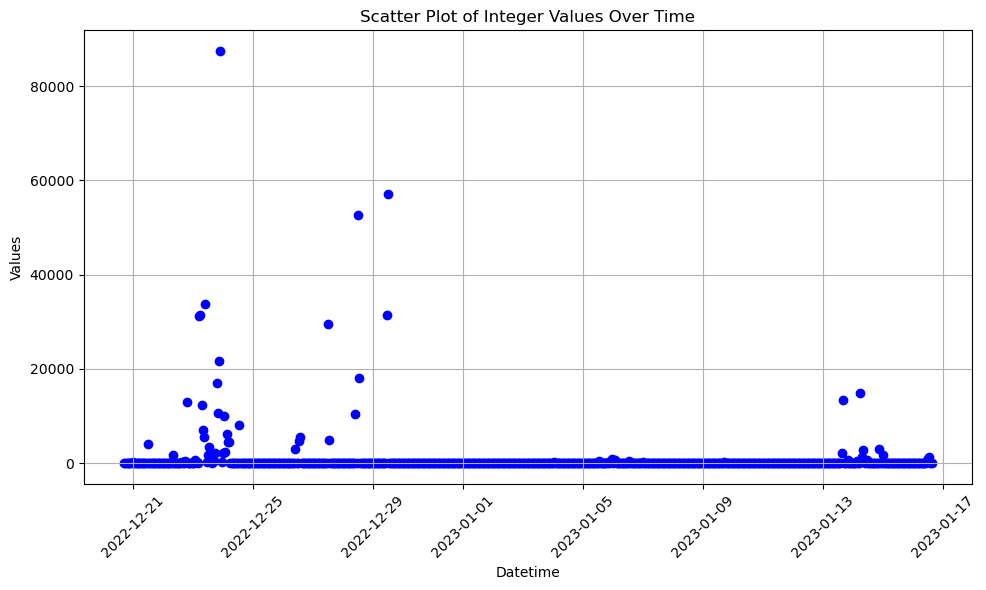

In [100]:

# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
plt.figure(figsize=(10, 6))
plt.scatter(df_hourly['date'], df_hourly['Value'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

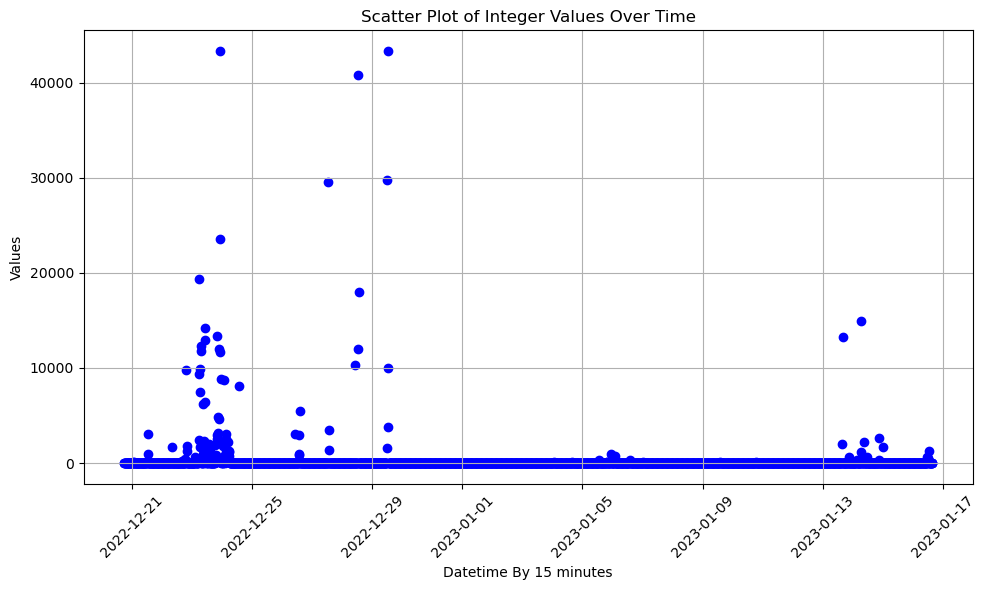

In [101]:
# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
plt.figure(figsize=(10, 6))
plt.scatter(df_minute['date'], df_minute['Value'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime By 15 minutes')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

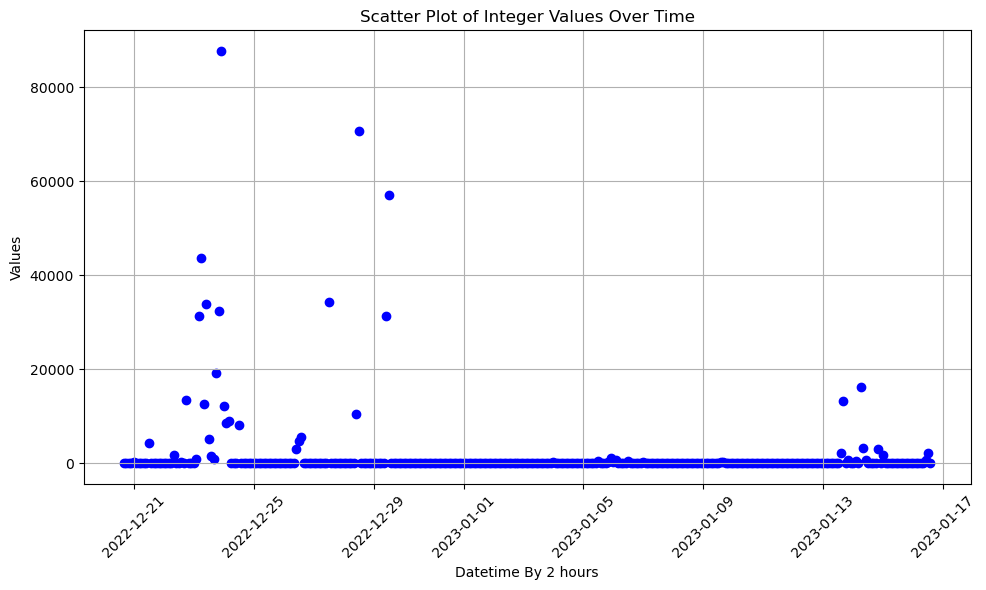

In [102]:
# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
plt.figure(figsize=(10, 6))
plt.scatter(df_2hours['date'], df_2hours['Value'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime By 2 hours')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

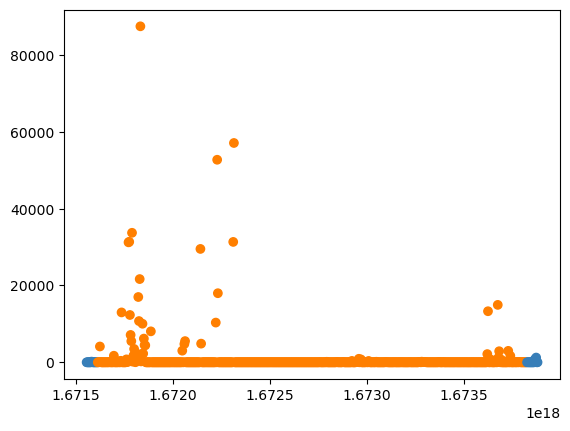

In [103]:
# Fit the model 
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

df_hourly['date'] = df_hourly['date'].values.astype("float64")
df_hourly['Value'] = df_hourly['Value'].values.astype("float64")

clf = LocalOutlierFactor(n_neighbors=30, contamination=0.05) 
y_pred = clf.fit_predict(df_hourly) 
# Generate colors based on the prediction
colors = np.array(['#377eb8', '#ff7f00']) 
plt.scatter(df_hourly['date'], df_hourly['Value'], color=colors[(y_pred + 1) // 2])

{0: 66, 1: 68, 2: 58, 3: 69, 4: 62, 5: 67, 6: 63, 7: 69, 8: 59, 9: 66}


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


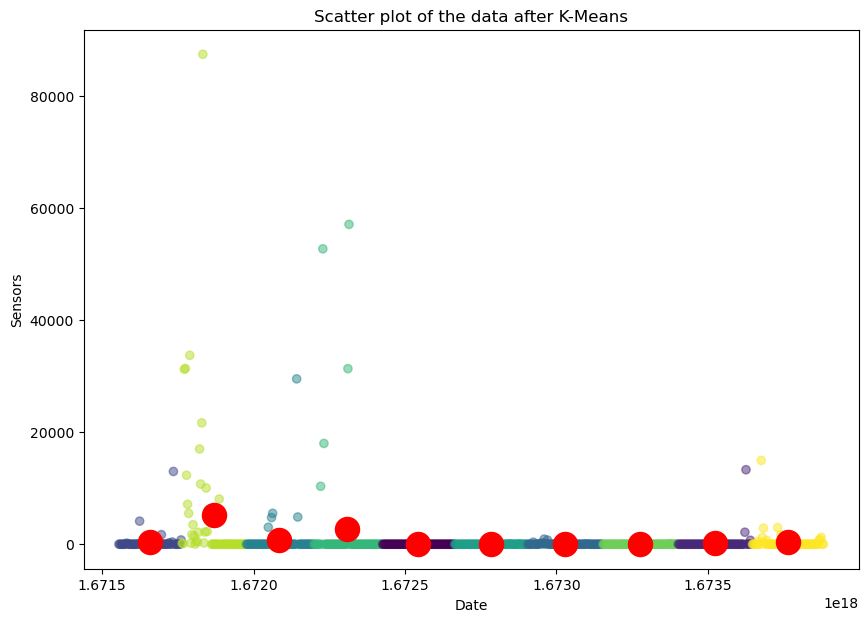

[1.02600003e+14 9.90000035e+13 9.54000008e+13 9.18000036e+13
 8.82000028e+13 8.46000047e+13 8.10000024e+13 7.73999954e+13
 7.37999950e+13 7.01999979e+13]


In [104]:
# k means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_hourly)

# Predict the cluster labels: labels
labels = kmeans.predict(df_hourly)
# print(labels)

unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

plt.figure(figsize=(10,7))
plt.scatter(df_hourly['date'], df_hourly['Value'], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.title('Scatter plot of the data after K-Means')
plt.xlabel('Date')
plt.ylabel('Sensors')
plt.show()

# Compute the distances to the cluster centers
distances = kmeans.transform(df_hourly)

# Compute the anomaly score (distance to the closest centroid)
scores = distances.min(axis=1)

# Print the first 10 anomaly scores
print(scores[:10])



C:\Users\mt5864s\AppData\Local\Temp\ipykernel_31376\4051798993.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Reds")


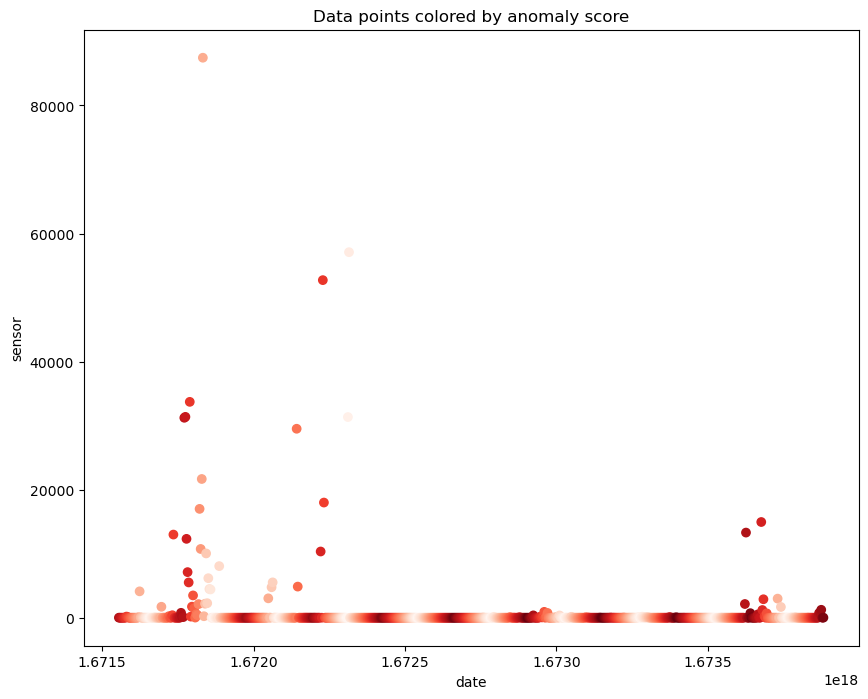

In [105]:
#Define the color map to convert scores to colors

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a color map that maps scores to colors
cmap = cm.get_cmap("Reds")

# Normalize the scores to the range [0, 1] for color mapping
normalized_scores = (scores-min(scores)) / (max(scores)-min(scores))

# Create a scatter plot of the PCA-transformed data with points colored by anomaly score
plt.figure(figsize=(10, 8))
plt.scatter(df_hourly['date'], df_hourly['Value'], c=cmap(normalized_scores))
# plt.colorbar(label='Anomaly score')
plt.xlabel('date')
plt.ylabel('sensor')
plt.title('Data points colored by anomaly score')
plt.show()

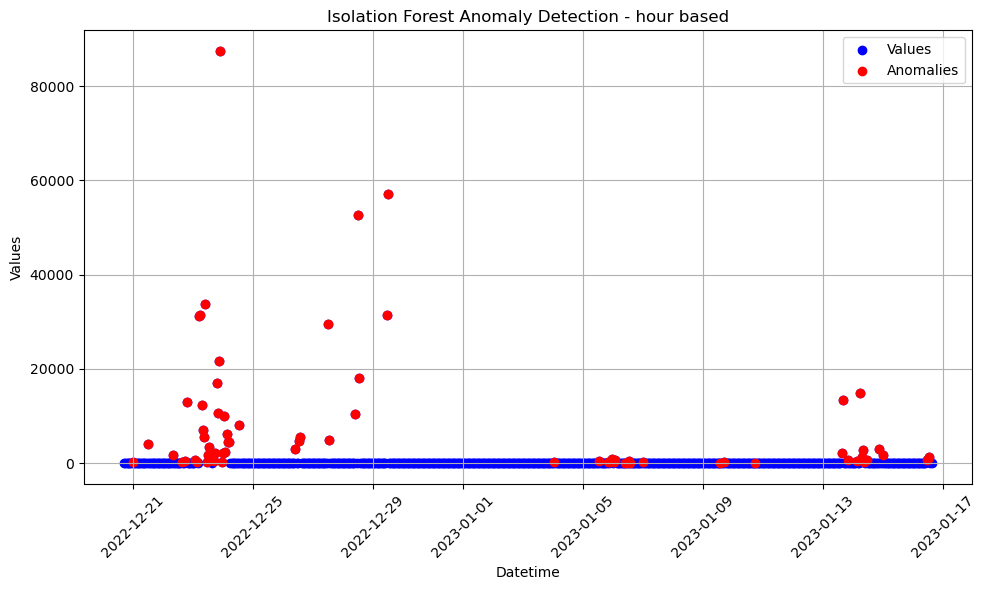

Total anomalies: 71, Percentage of anomalous values: 10.973724884080372%
                   date  Value  anomaly
0   2022-12-20 17:00:00    8.0        1
1   2022-12-20 18:00:00    0.0        1
2   2022-12-20 19:00:00    0.0        1
3   2022-12-20 20:00:00    0.0        1
4   2022-12-20 21:00:00    0.0        1
..                  ...    ...      ...
639 2023-01-16 08:00:00    1.0        1
640 2023-01-16 09:00:00    2.0        1
641 2023-01-16 10:00:00    5.0        1
645 2023-01-16 14:00:00    2.0        1
646 2023-01-16 15:00:00   15.0        1

[576 rows x 3 columns]


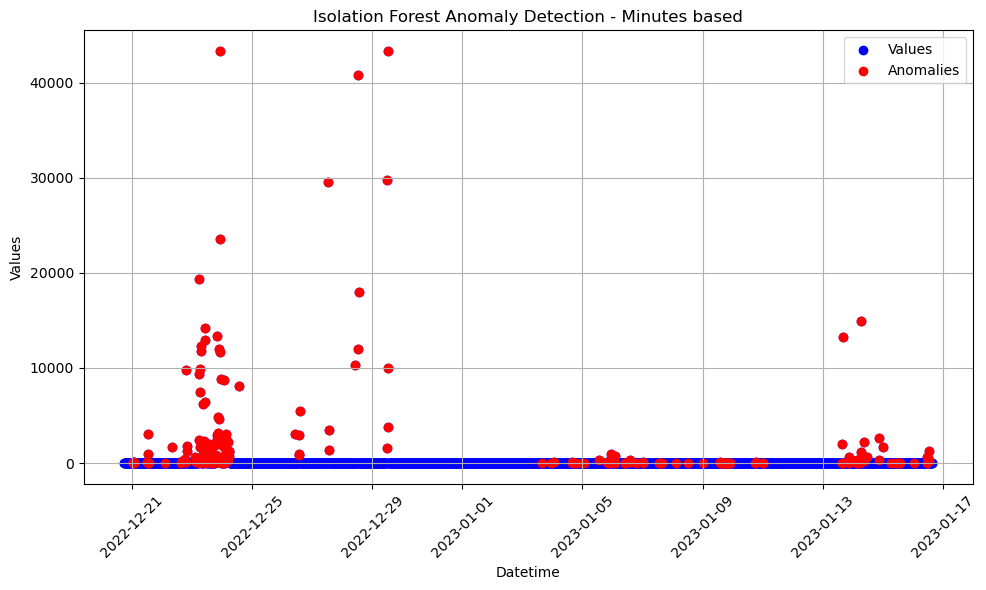

                    date  Value  anomaly
0    2022-12-20 17:30:00    4.0        1
1    2022-12-20 17:45:00    4.0        1
2    2022-12-20 18:00:00    0.0        1
3    2022-12-20 18:15:00    0.0        1
4    2022-12-20 18:30:00    0.0        1
...                  ...    ...      ...
2581 2023-01-16 14:45:00    1.0        1
2582 2023-01-16 15:00:00    7.0        1
2583 2023-01-16 15:15:00    0.0        1
2584 2023-01-16 15:30:00    4.0        1
2585 2023-01-16 15:45:00    4.0        1

[2373 rows x 3 columns]
Total anomalies: 213, Percentage of anomalous values: 8.236658932714617%


In [106]:
# isolation forest
from sklearn.ensemble import IsolationForest

df_hourly['date'] = pd.to_datetime(df_hourly['date'])

# Prepare data for IsolationForest
values = df_hourly[['Value']]  # Selecting the 'values' column as input for the model

# Initialize and fit the IsolationForest model
model = IsolationForest( random_state=42)
df_hourly['anomaly'] = model.fit_predict(values)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies = df_hourly[df_hourly['anomaly'] == -1]
regular = df_hourly[df_hourly['anomaly'] == 1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_hourly['date'], df_hourly['Value'], label='Values', color='blue')
plt.scatter(anomalies['date'], anomalies['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - hour based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
# print(anomalies)
# Calculate the percentage of values equal to -1
count_anomaly_h = (df_hourly['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_h = (count_anomaly_h / len(df_hourly)) * 100
print(f"Total anomalies: {count_anomaly_h}, Percentage of anomalous values: {percentage_h}%")
print(regular)

# anomalies by minutes
df_minute['date'] = pd.to_datetime(df_minute['date'])

# Prepare data for IsolationForest
values_m = df_minute[['Value']]  # Selecting the 'values' column as input for the model

df_minute['anomaly'] = model.fit_predict(values_m)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_m = df_minute[df_minute['anomaly'] == -1]
regular_m = df_minute[df_minute['anomaly'] == 1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_minute['date'], df_minute['Value'], label='Values', color='blue')
plt.scatter(anomalies_m['date'], anomalies_m['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - Minutes based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(regular_m)
# Calculate the percentage of values equal to -1
count_anomaly_m = (df_minute['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_m = (count_anomaly_m / len(df_minute)) * 100
print(f"Total anomalies: {count_anomaly_m}, Percentage of anomalous values: {percentage_m}%")


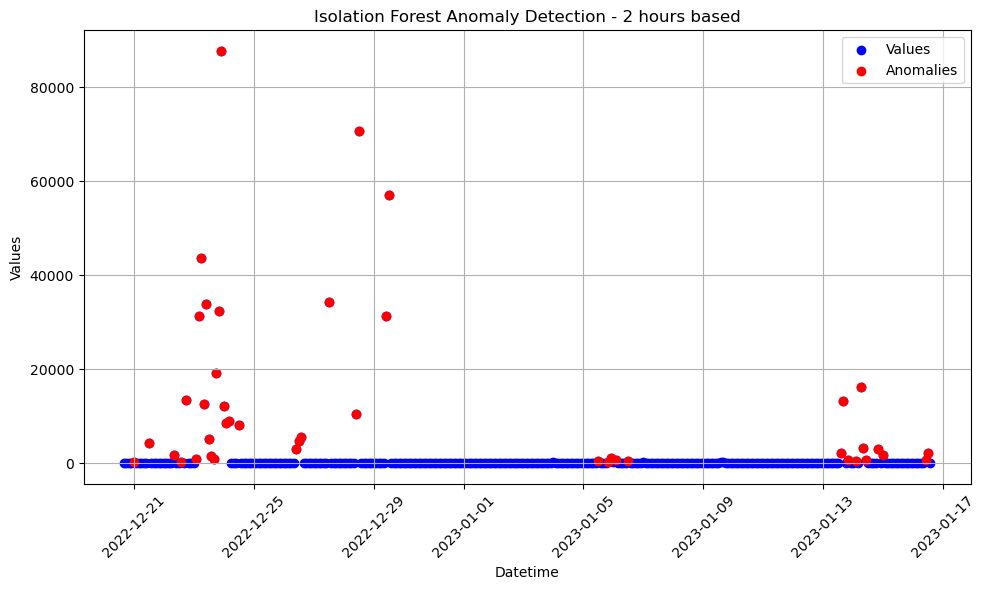

                   date  Value  anomaly
0   2022-12-20 16:00:00    8.0        1
1   2022-12-20 18:00:00    0.0        1
2   2022-12-20 20:00:00    0.0        1
3   2022-12-20 22:00:00    3.0        1
5   2022-12-21 02:00:00    0.0        1
..                  ...    ...      ...
317 2023-01-16 02:00:00    3.0        1
318 2023-01-16 04:00:00    2.0        1
319 2023-01-16 06:00:00    2.0        1
320 2023-01-16 08:00:00    3.0        1
323 2023-01-16 14:00:00   17.0        1

[280 rows x 3 columns]
Total anomalies: 44, Percentage of anomalous values: 13.580246913580247%


In [107]:
# anomalies by 2 hours
model = IsolationForest(contamination='auto', random_state=42)
df_2hours['date'] = pd.to_datetime(df_2hours['date'])

# Prepare data for IsolationForest
values_2h = df_2hours[['Value']]  # Selecting the 'values' column as input for the model

df_2hours['anomaly'] = model.fit_predict(values_2h)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_2h = df_2hours[df_2hours['anomaly'] == -1]
regular_2h = df_2hours[df_2hours['anomaly'] == 1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_2hours['date'], df_2hours['Value'], label='Values', color='blue')
plt.scatter(anomalies_2h['date'], anomalies_2h['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - 2 hours based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(regular_2h)
# Calculate the percentage of values equal to -1
count_anomaly_2h = (df_2hours['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_2h = (count_anomaly_2h / len(df_2hours)) * 100
print(f"Total anomalies: {count_anomaly_2h}, Percentage of anomalous values: {percentage_2h}%")

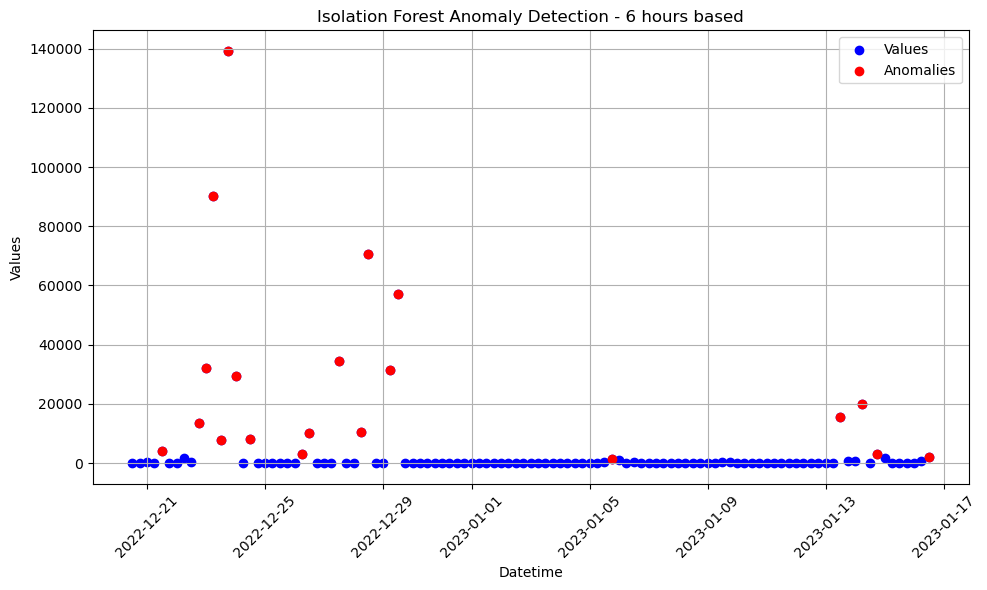

                   date     Value  anomaly
4   2022-12-21 12:00:00    4178.0       -1
9   2022-12-22 18:00:00   13396.0       -1
10  2022-12-23 00:00:00   32266.0       -1
11  2022-12-23 06:00:00   90210.0       -1
12  2022-12-23 12:00:00    7657.0       -1
13  2022-12-23 18:00:00  139216.0       -1
14  2022-12-24 00:00:00   29569.0       -1
16  2022-12-24 12:00:00    8063.0       -1
23  2022-12-26 06:00:00    3049.0       -1
24  2022-12-26 12:00:00   10302.0       -1
28  2022-12-27 12:00:00   34376.0       -1
31  2022-12-28 06:00:00   10355.0       -1
32  2022-12-28 12:00:00   70715.0       -1
35  2022-12-29 06:00:00   31338.0       -1
36  2022-12-29 12:00:00   57087.0       -1
65  2023-01-05 18:00:00    1433.0       -1
96  2023-01-13 12:00:00   15449.0       -1
99  2023-01-14 06:00:00   19954.0       -1
101 2023-01-14 18:00:00    2997.0       -1
108 2023-01-16 12:00:00    2093.0       -1
Total anomalies: 20, Percentage of anomalous values: 18.34862385321101%


In [108]:
# anomalies by 6 hours
model = IsolationForest(contamination='auto', random_state=42)
df_6hours['date'] = pd.to_datetime(df_6hours['date'])

# Prepare data for IsolationForest
values_6h = df_6hours[['Value']]  # Selecting the 'values' column as input for the model

df_6hours['anomaly'] = model.fit_predict(values_6h)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_6h = df_6hours[df_6hours['anomaly'] == -1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_6hours['date'], df_6hours['Value'], label='Values', color='blue')
plt.scatter(anomalies_6h['date'], anomalies_6h['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - 6 hours based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(anomalies_6h)
# Calculate the percentage of values equal to -1
count_anomaly_6h = (df_6hours['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_6h = (count_anomaly_6h / len(df_6hours)) * 100
print(f"Total anomalies: {count_anomaly_6h}, Percentage of anomalous values: {percentage_6h}%")

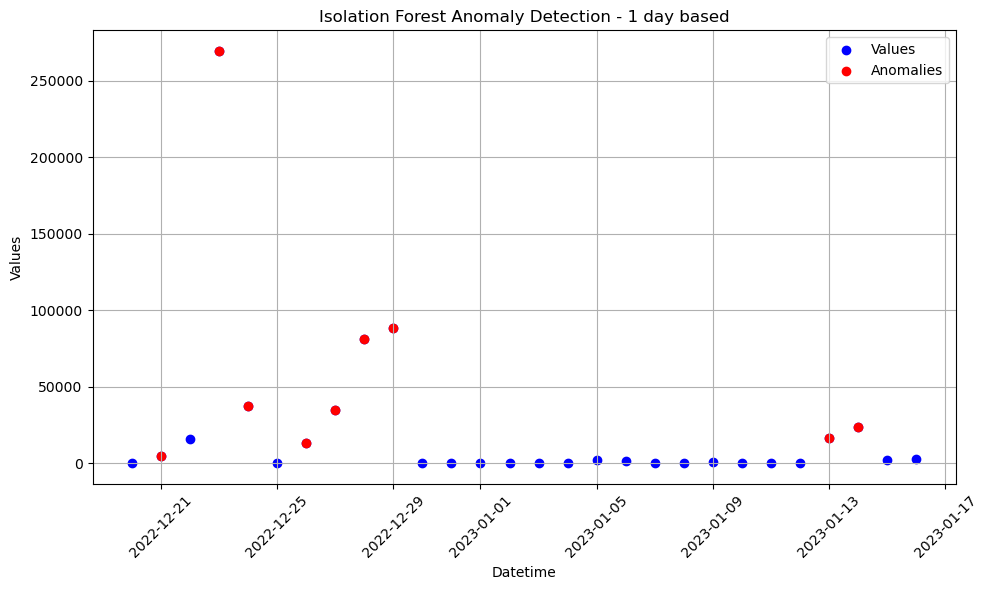

         date     Value  anomaly
1  2022-12-21    4562.0       -1
3  2022-12-23  269349.0       -1
4  2022-12-24   37639.0       -1
6  2022-12-26   13370.0       -1
7  2022-12-27   34416.0       -1
8  2022-12-28   81100.0       -1
9  2022-12-29   88433.0       -1
24 2023-01-13   16221.0       -1
25 2023-01-14   23515.0       -1
Total anomalies: 9, Percentage of anomalous values: 32.142857142857146%


In [109]:
# anomalies by 1 day
model = IsolationForest(contamination='auto', random_state=42)
df_day['date'] = pd.to_datetime(df_day['date'])

# Prepare data for IsolationForest
values_d = df_day[['Value']]  # Selecting the 'values' column as input for the model

df_day['anomaly'] = model.fit_predict(values_d)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_d = df_day[df_day['anomaly'] == -1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_day['date'], df_day['Value'], label='Values', color='blue')
plt.scatter(anomalies_d['date'], anomalies_d['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - 1 day based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(anomalies_d)
# Calculate the percentage of values equal to -1
count_anomaly_d = (df_day['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_d = (count_anomaly_d / len(df_day)) * 100
print(f"Total anomalies: {count_anomaly_d}, Percentage of anomalous values: {percentage_d}%")

In [ ]:
# print(df.head(10))
regular_date = regular.set_index('date')
regular_idx = regular_date.index
# print(regular_idx)

# Filtering out the hourly anomalous data from the original data
filtered_df = df[df.index.floor('H').isin(regular_idx)].reset_index()

# filtered_df = df[df.index.floor('H')]
print(filtered_df.Sensor.unique(), df.Sensor.unique())

u = df.Sensor.unique()
adjMat = pd.DataFrame(0.0, columns=u, index=u)
adjMat2 = pd.DataFrame(0.0, columns=u, index=u)
adjMatFiltered = pd.DataFrame(0.0, columns=u, index=u)
adjMat4 = pd.DataFrame(0.0, columns=u, index=u)


['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light'] ['bathroom_door' 'bathroom_button' 'bathroom_light' 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light']


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_31376\932051218.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  filtered_df = df[df.index.floor('H').isin(regular_idx)].reset_index()


In [ ]:
## FNE for original data
from math import ceil

prevRow = df.iloc[0]
for _,curRow in df.iterrows():
    if (curRow.Sensor != prevRow.Sensor):
        t = max(ceil(curRow.seconds_since_epoch - prevRow.seconds_since_epoch), 1.0)
        # t = max(ceil((curRow.DateTime - prevRow.DateTime).total_seconds()),1.0)
        adjMat[prevRow.Sensor][curRow.Sensor] += 1/t
    prevRow = curRow

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_31376\1240244173.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMat[prevRow.Sensor][curRow.Sensor] += 1/t


In [ ]:
## TD for original data
curGroup = []
th = 2
prevRow = df.iloc[0]
for _, curRow in df.iterrows():
    if ((curRow.seconds_since_epoch - prevRow.seconds_since_epoch) >= th):
        curGroup = []
    if not(curRow.Sensor in curGroup):
        curGroup.append(curRow.Sensor)
    for item in curGroup:
        adjMat2[item][curRow.Sensor] += 1
    prevRow = curRow

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_31376\1685643654.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMat2[item][curRow.Sensor] += 1


In [135]:
from sklearn.cluster import SpectralClustering

sp = SpectralClustering(4,affinity="precomputed")
clus = sp.fit_predict(adjMat)

clus2 = sp.fit_predict(adjMat2)

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [136]:
display(pd.DataFrame(clus,index=adjMat.index))

display(pd.DataFrame(clus2,index=adjMat2.index))


,0
bathroom_door,1
bathroom_button,1
bathroom_light,1
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,0
living_light,0


,0
bathroom_door,0
bathroom_button,0
bathroom_light,0
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,1
living_light,1


In [ ]:
## FNE for filtered data
prevRow = filtered_df.iloc[0]
for _,curRow in filtered_df.iterrows():
    if (curRow.Sensor != prevRow.Sensor):
        t = max(ceil(curRow.seconds_since_epoch - prevRow.seconds_since_epoch), 1.0)
        # t = max(ceil((curRow.DateTime - prevRow.DateTime).total_seconds()),1.0)
        adjMatFiltered[prevRow.Sensor][curRow.Sensor] += 1/t
    prevRow = curRow

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_31376\2350203968.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatFiltered[prevRow.Sensor][curRow.Sensor] += 1/t


In [139]:
sp3 = SpectralClustering(4,affinity="precomputed")
clus3 = sp3.fit_predict(adjMatFiltered)

display(pd.DataFrame(clus3,index=adjMatFiltered.index))

print(clus3)

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,0
bathroom_door,1
bathroom_button,1
bathroom_light,1
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,0
living_light,0


[1 1 1 2 2 3 3 0 0]


In [ ]:
### TD for filtered data
curGroup = []
th = 2
prevRow = filtered_df.iloc[0]
for _, curRow in filtered_df.iterrows():
    if ((curRow.seconds_since_epoch - prevRow.seconds_since_epoch) >= th):
        curGroup = []
    if not(curRow.Sensor in curGroup):
        curGroup.append(curRow.Sensor)
    for item in curGroup:
        adjMat4[item][curRow.Sensor] += 1
    prevRow = curRow

sp4 = SpectralClustering(4,affinity="precomputed")
clus4 = sp4.fit_predict(adjMat4)

display(pd.DataFrame(clus4,index=adjMat4.index))

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_31376\2385477219.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMat4[item][curRow.Sensor] += 1
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embe

,0
bathroom_door,1
bathroom_button,1
bathroom_light,1
bedroom_light,2
bedroom_button,2
kitchen_light,3
kitchen_motion,3
living_button,0
living_light,0


Calinski-Harabasz Score TD filtered: 2.3730583964015106
Silhouette Score TD filtered: -0.05440056365276177


In [ ]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

ch_score = calinski_harabasz_score(adjMat, clus)
print(f"Calinski-Harabasz Score FNE: {ch_score}")

silhouette_avg = silhouette_score(adjMat, clus)
print(f"Silhouette Score FNE: {silhouette_avg}")

# Calculate Davies-Bouldin score
db_score = davies_bouldin_score(adjMat, clus)
print(f"Davies-Bouldin Score FNE: {db_score}")

ch_score_td = calinski_harabasz_score(adjMat2, clus2)
print(f"Calinski-Harabasz Score TD: {ch_score_td}")

silhouette_avg_td = silhouette_score(adjMat2, clus2)
print(f"Silhouette Score TD: {silhouette_avg_td}")

# Calculate Davies-Bouldin score
db_score2 = davies_bouldin_score(adjMat2, clus2)
print(f"Davies-Bouldin Score TD: {db_score2}")

ch_score_3 = calinski_harabasz_score(adjMatFiltered, clus3)
print(f"Calinski-Harabasz Score FNE filtered: {ch_score_3}")

silhouette_avg_3 = silhouette_score(adjMatFiltered, clus3)
print(f"Silhouette Score FNE filtered: {silhouette_avg_3}")

# Calculate Davies-Bouldin score
db_score3 = davies_bouldin_score(adjMatFiltered, clus3)
print(f"Davies-Bouldin Score FNE filtered: {db_score3}")


ch_score_4 = calinski_harabasz_score(adjMat4, clus4)
print(f"Calinski-Harabasz Score TD filtered: {ch_score_4}")

silhouette_avg_4 = silhouette_score(adjMat4, clus4)
print(f"Silhouette Score TD filtered: {silhouette_avg_4}")

# Calculate Davies-Bouldin score
db_score4 = davies_bouldin_score(adjMat4, clus4)
print(f"Davies-Bouldin Score TD Filtered: {db_score4}")

Calinski-Harabasz Score FNE: 1.2970153085560592
Silhouette Score FNE: -0.10651129175710748
Davies-Bouldin Score FNE: 1.1832191199346855
Calinski-Harabasz Score TD: 1.081555206297452
Silhouette Score TD: -0.31243299188818086
Davies-Bouldin Score TD: 1.3741923419291324
Calinski-Harabasz Score FNE filtered: 1.2973429678287751
Silhouette Score FNE filtered: -0.1560818297575156
Davies-Bouldin Score FNE filtered: 1.2301477677263857
Calinski-Harabasz Score TD filtered: 2.3730583964015106
Silhouette Score TD filtered: -0.05440056365276177
Davies-Bouldin Score TD Filtered: 1.1865204523147785
